In [1]:
import pandas as pd

# Carga los CSV que tienes en data/
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
fuelCon = pd.read_csv("../data/FuelConsumptionCo2.csv")

# Vemos cuántas filas y columnas tiene cada uno
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("FuelCon shape:", fuelCon.shape)

Train shape: (19237, 18)
Test shape: (8245, 18)
FuelCon shape: (1067, 13)


In [2]:
print("Columnas y tipos de datos en fuelCon:")
print(fuelCon.dtypes)
print("\nColumnas del fuelCon:")
print(fuelCon.columns.tolist())

Columnas y tipos de datos en fuelCon:
MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

Columnas del fuelCon:
['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']


In [3]:
print("\nValores nulos por columna en fuelCon:")
print(fuelCon.isnull().sum())


Valores nulos por columna en fuelCon:
MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


In [4]:
print("\nEstadísticas numéricas de fuelCon:")
print(fuelCon.describe())


Estadísticas numéricas de fuelCon:
       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000             

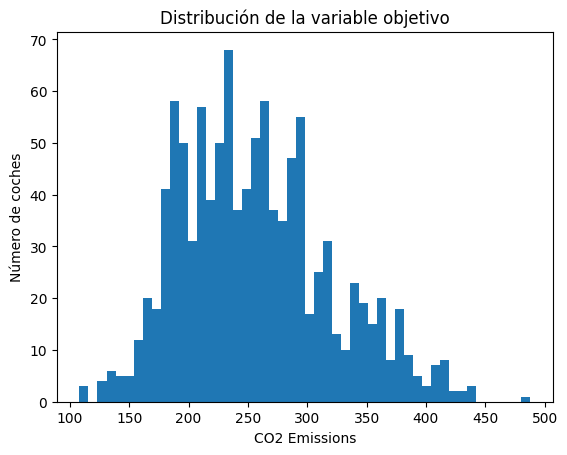


Descripción de CO2EMISSIONS:
count    1067.000000
mean      256.228679
std        63.372304
min       108.000000
25%       207.000000
50%       251.000000
75%       294.000000
max       488.000000
Name: CO2EMISSIONS, dtype: float64


In [8]:
import matplotlib.pyplot as plt

plt.hist(fuelCon['CO2EMISSIONS'], bins=50)
plt.xlabel('CO2 Emissions')
plt.ylabel('Número de coches')
plt.title('Distribución de la variable objetivo')
plt.show()

print("\nDescripción de CO2EMISSIONS:")
print(fuelCon['CO2EMISSIONS'].describe())


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Columnas
cat_cols = ['Levy','Manufacturer','Model','Category','Leather interior','Fuel type',
            'Gear box type','Drive wheels','Doors','Wheel','Color']
num_cols = ['Prod. year','Cylinders','Airbags','Engine volume','Mileage']


# Limpiar columnas numéricas que son object (por ejemplo 'Mileage', 'Engine volume', 'Levy')
# Aquí puedes convertir strings a float/int
for col in ['Engine volume','Mileage','Levy']:
    fuelCon[col] = fuelCon[col].replace('[^\d.]','', regex=True).astype(float)

# Transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Features y target
X = preprocessor.fit_transform(fuelCon)
y = fuelCon['Price'].values.reshape(-1,1)


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\xavie\AppData\Local\Temp\ipykernel_32272\4272392925.py:13: SyntaxWarning: invalid escape sequence '\d'
  fuelCon[col] = fuelCon[col].replace('[^\d.]','', regex=True).astype(float)
C:\Users\xavie\AppData\Local\Temp\ipykernel_32272\4272392925.py:13: SyntaxWarning: invalid escape sequence '\d'
  fuelCon[col] = fuelCon[col].replace('[^\d.]','', regex=True).astype(float)


KeyError: 'Engine volume'